<hr/>

# Data Presentation- 311 Service Requests <br> **https://data.boston.gov/dataset/311-service-requests** 

<hr/>

# 1. Purpose of dataset
> 311 is a 24/7 line that connects citizens with Service Center representatives for non-emergency city services and information <br>
> It is predominantly known for maintenance requests of public works

# 2. Features of dataset
- CLOSURE_REASON 
> Employees give a closure status & depict findings or work done that closed the case <br>
> i.e. resolved loose trash, no violation found, sent in for collection, etc 

- CLOSURE_STATUS 
> Denoted the status of the case when it was closed <br>
> i.e. RESOLVED, NOTED, CLOSED, PERMIS (permit issued), TFA (tenant failed appointment), INVALID, NOVIO (no violation), SCHEDULED, ROA (refer to another agency), NOBASE (no basis for caller complaints), NOACC (no access to issue or problem area) 

- CASE_TITLE
> Basic title given to each case (entered by call takers on call-by-call basis) <br>
> SUBJECT, REASON, and TYPE also assigned to generalize issue

- DEPARTMENT 
> Department a case is assigned to <br>
> i.e. public works, inspectional services, animal control, etc

- NEIGHBORHOOD and LOCATION_ZIPCODE
> Depict where the call came from <br>
> More information on exact location also provided

- EXTRANEOUS FEATURES
> ID, ONTIME, QUEUE, SUBMITTED PHOTO, CLOSED PHOTO, LOCATION, FIRE_DISTRICT, POLICE_DISTRICT, CITY_COUNCIL_DISTRICT, PWD_DISTRICT (public works), NEIGHBORHOOD_SERVICES_DISTRICT, WARD, PRECINCT, LOCATION_STREET_NAME, LATITUDE, LONGITUDE, SOURCE

# 3. Importing and viewing dataset

In [15]:
# importing csv file for 2021 311 Service Requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv("Documents/3 Junior Spring/Research in Applied Math- Data Science/tmpleos0nte.csv", header=None, low_memory = False)                                                 
array = df.values

# viewing the beginning of the dataset
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
1,101003578872,2021-01-01 00:06:37,2021-01-06 08:30:00,2021-01-01 05:36:42,ONTIME,Closed,Case Closed. Closed date : Fri Jan 01 05:36:42...,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,...,C11,Dorchester,5,Ward 7,0709,797 Columbia Rd,02125,42.3202,-71.0572,Citizens Connect App
2,101003578875,2021-01-01 00:15:47,2021-01-05 08:30:00,2021-01-02 12:49:26,ONTIME,Closed,Case Closed. Closed date : 2021-01-02 12:49:26...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,D14,Allston / Brighton,15,Ward 22,2211,50 Newton St,02135,42.3569,-71.165,Citizens Connect App
3,101003578879,2021-01-01 00:26:46,NaN,2021-01-04 13:56:41,ONTIME,Closed,Case Closed. Closed date : 2021-01-04 13:56:41...,Notification,Mayor's 24 Hour Hotline,Notification,...,B2,Dorchester,13,13,1305,693 Dudley St,02125,42.3594,-71.0587,Constituent Call
4,101003578880,2021-01-01 00:27:00,NaN,2021-03-18 03:02:40,ONTIME,Closed,Case Closed Case Noted,Fire,Mayor's 24 Hour Hotline,Notification,...,B2,Dorchester,13,7,0710,INTERSECTION Nonquit St & Dudley St,NaN,42.3594,-71.0587,Constituent Call
5,101003578881,2021-01-01 00:36:34,2021-01-07 08:30:00,2021-01-01 05:43:25,ONTIME,Closed,Case Closed. Closed date : Fri Jan 01 05:43:25...,Poor Conditions of Property,Public Works Department,Code Enforcement,...,C11,Dorchester,7,Ward 13,1306,83-93 Stoughton St,02125,42.3157,-71.0623,Citizens Connect App
6,101003578883,2021-01-01 00:38:15,2021-01-07 08:30:00,2021-01-01 05:50:34,ONTIME,Closed,Case Closed. Closed date : Fri Jan 01 05:50:34...,Poor Conditions of Property,Public Works Department,Code Enforcement,...,C11,Dorchester,7,Ward 13,1306,14 Windermere Rd,02125,42.3146,-71.0621,Citizens Connect App
7,101003578887,2021-01-01 01:44:00,2021-01-07 08:30:00,2021-01-04 08:48:56,ONTIME,Closed,Case Closed. Closed date : 2021-01-04 08:48:56...,Work Hours-Loud Noise Complaints,Public Works Department,Highway Maintenance,...,D14,Allston / Brighton,15,21,2115,INTERSECTION Strathmore Rd & Sutherland Rd,NaN,42.3594,-71.0587,Constituent Call
8,101003578889,2021-01-01 01:46:00,2021-01-05 08:30:00,2021-01-02 12:53:10,ONTIME,Closed,Case Closed. Closed date : 2021-01-02 12:53:10...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,B2,Roxbury,13,12,1203,INTERSECTION Elmore St & Kensington St,NaN,42.3594,-71.0587,Constituent Call
9,101003578890,2021-01-01 02:49:00,2021-01-05 08:30:00,2021-01-01 03:17:49,ONTIME,Closed,Case Closed. Closed date : Fri Jan 01 03:17:49...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,B2,Mission Hill,14,10,1003,INTERSECTION Wait St & Huntington Ave,NaN,42.3594,-71.0587,Constituent Call


### Initial insight from dataset
> 273952 cases in 2021 311 Service Requests <br>
> 27 features for each case <br>
> Many entries are NaN (i.e. not entered)

In [16]:
# calculating total number of non-closed cases
casesNotClosed = 0
totalCases = 273952.
for value in array[:, 5]:
    if value != 'Closed':
        casesNotClosed+= 1
        
print("Total number of cases not closed: " + str(casesNotClosed))

percentNotClosed = (casesNotClosed/totalCases)*100
percentClosed = (1-casesNotClosed/totalCases)*100
print("Proportion of cases not closed: " + "%0.2f" % percentNotClosed + "%")
print("Proportion of cases closed: " + "%0.2f" % percentClosed + "%")

Total number of cases not closed: 29237
Proportion of cases not closed: 10.67%
Proportion of cases closed: 89.33%


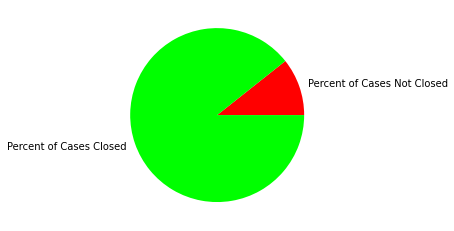

In [17]:
# creating pie chart for closed cases vs others
closedStatus = np.array([percentNotClosed, percentClosed])
closedStatusLabels = ["Percent of Cases Not Closed", "Percent of Cases Closed"]
closedStatusColors = ["red", "lime"]

plt.pie(closedStatus, labels = closedStatusLabels, colors = closedStatusColors)
plt.show() 

In [18]:
# finding number of unique entries of case titles
np.unique(array[:, 8], return_index=False, return_inverse=False, return_counts=False, axis=None)

array(['Animal Control', 'Boston Police Department',
       'Boston Water & Sewer Commission', 'Consumer Affairs & Licensing',
       'Inspectional Services', "Mayor's 24 Hour Hotline",
       'Neighborhood Services', 'Parks & Recreation Department',
       'Property Management', 'Public Works Department',
       'Transportation - Traffic Division', 'subject'], dtype=object)

In [19]:
# counting instances of each of the unique entries of case titles
# counting instances of each of the unique entries of case titles
requestTypes = ['Animal Control', 'Boston Police Department',
       'Boston Water & Sewer Commission', 'Consumer Affairs & Licensing',
       'Inspectional Services', "Mayor's 24 Hour Hotline",
       'Neighborhood Services', 'Parks & Recreation Department',
       'Property Management', 'Public Works Department',
       'Transportation - Traffic Division', 'subject'] 
requestTypeCases = []

for i in range(len(requestTypes)):
    requestTypeCases.append(array[:, 8][array[:, 8] == requestTypes[i]].shape[0])
    print(requestTypes[i] + " cases: " + str(requestTypeCases[i]))

Animal Control cases: 4106
Boston Police Department cases: 543
Boston Water & Sewer Commission cases: 1440
Consumer Affairs & Licensing cases: 2
Inspectional Services cases: 21786
Mayor's 24 Hour Hotline cases: 11957
Neighborhood Services cases: 40
Parks & Recreation Department cases: 18011
Property Management cases: 5182
Public Works Department cases: 136274
Transportation - Traffic Division cases: 74610
subject cases: 1


We may note that only one case was labeled 'subject', and only 42 other cases involved consumer affairs and neighborhood services. Hence, we will only plot the types of cases with 500+ occurrences on the histogram as those are negligible for the 29237 total cases. Therefore, we only have 29194 cases with relevant case titles.

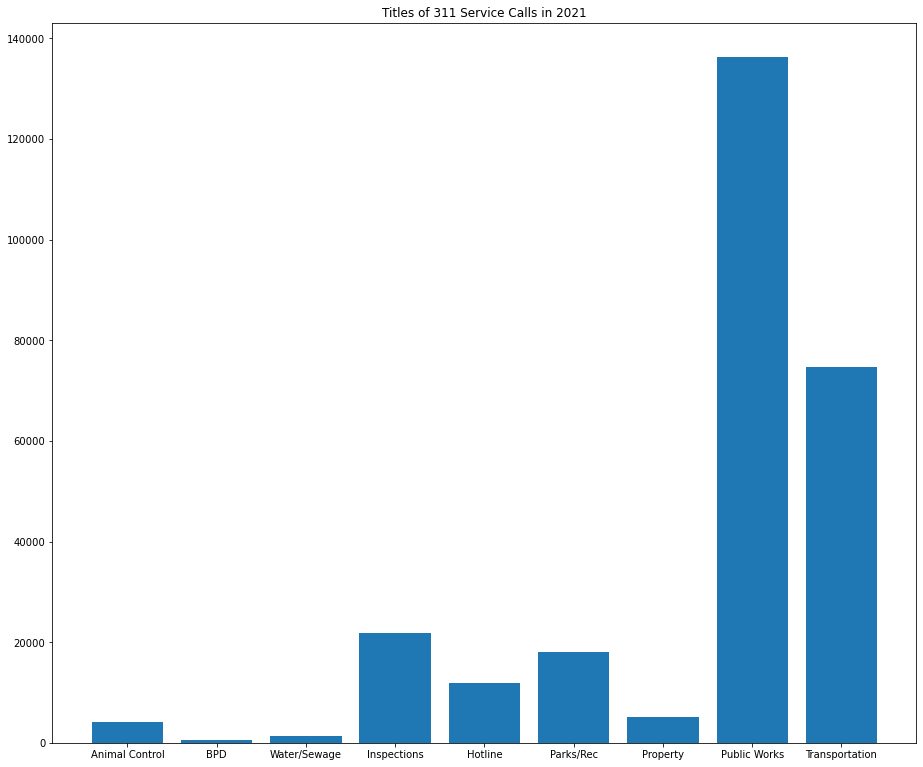

In [20]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0,0,1,1])
countLabels = ['Animal Control', 'BPD', 'Water/Sewage', 'Inspections', 'Hotline', 'Parks/Rec', 'Property', 'Public Works', 'Transportation']
countValues = [4106, 543, 1440, 21786, 11957, 18011, 5182, 136274, 74610]
ax.bar(countLabels, countValues)
plt.title("Titles of 311 Service Calls in 2021")
plt.show()

Similarly, we will create a histogram for the zip codes that created 311 calls.

In [8]:
# finding number of unique entries of zip codes
df25 = df.dropna(subset=[25])
array25 = df25.values # dropping rows with no entries for zip code

# comparing original column for zipcodes with new one
print(array[1:, 25])
print(array25[1:, 25])

# finding number of service requests with zipcode entries
print(len(array25))

['02125' '02135' '02125' ... nan '02124' '02109']
['02125' '02135' '02125' ... '02126' '02124' '02109']
212882


In [9]:
# finding number of unique entries of case titles
np.unique(array25[1:, 25], return_index=False, return_inverse=False, return_counts=False, axis=None)

array(['02108', '02109', '02110', '02111', '02113', '02114', '02115',
       '02116', '02118', '02119', '02120', '02121', '02122', '02124',
       '02125', '02126', '02127', '02128', '02129', '02130', '02131',
       '02132', '02133', '02134', '02135', '02136', '02163', '02199',
       '02201', '02203', '02210', '02215', '02446', '02467'], dtype=object)

In [41]:
# finding the number of instances of each zipcode from 311 requests
zipcodeArray = ['02108', '02109', '02110', '02111', '02113', '02114', '02115',
       '02116', '02118', '02119', '02120', '02121', '02122', '02124',
       '02125', '02126', '02127', '02128', '02129', '02130', '02131',
       '02132', '02133', '02134', '02135', '02136', '02163', '02199',
       '02201', '02203', '02210', '02215', '02446', '02467']
zipcodeCount = []

for i in range(len(zipcodeArray)):
    zipcodeCount.append(array25[1:, 25][array25[1:, 25] == zipcodeArray[i]].shape[0])
        
print("Zipcodes in Boston: " + str(zipcodeArray) + "\n")
print("Number of requests by zipcode " + str(zipcodeCount))

Zipcodes in Boston: ['02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02127', '02128', '02129', '02130', '02131', '02132', '02133', '02134', '02135', '02136', '02163', '02199', '02201', '02203', '02210', '02215', '02446', '02467']

Number of requests by zipcode [2872, 2111, 740, 2205, 4297, 5451, 4633, 11501, 13644, 9767, 3438, 7974, 7495, 15967, 12652, 7568, 21082, 16069, 7053, 11334, 8398, 7583, 3, 4882, 11121, 7790, 14, 151, 8, 8, 1452, 3488, 5, 125]


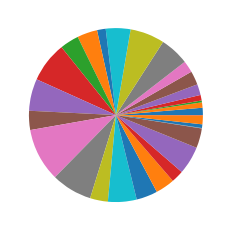

In [42]:
# Creating pie chart for zipcode 311 requests
plt.pie(zipcodeCount)
plt.show() 

## We can now use other data sets (http://www.usa.com/rank/massachusetts-state--median-household-income--zip-code-rank.htm) to find the population and median household income for each zipcode.

# 4. Possibility for future research with this dataset

### Regression between number of 311 requests per zipcode & average income per capita in said zipcode
> Do people from lower income areas create more service requests?
> Can this be tested for statistical significance?
> Does this imply correlation between income status and poor infrastructure? 
### Plotting location of different types of 311 requests 
> Are certain areas more likely to have transportation issues? Public works issues? etc
### Checking areas for non-completed 311 requests
> Is this randomly distributed?